_version log: average 1D fourier transform of every row_

In [10]:
from numpy import genfromtxt
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage
import pandas as pd

beamABroadband = genfromtxt('data\\0307_BB_BA.csv', delimiter=';') #data\\beama2_broad.csv
beamBBroadband = genfromtxt('data\\0307_BB_BB.csv', delimiter=';') #data\\beamb2_broad.csv
fringesBroadband = genfromtxt('data\\0307_fringesBB.csv', delimiter=';') #data\\fringes2_broad.csv

In [11]:
#run this cell to import .tif and .tiff images insted
from PIL import Image

im = Image.open('data\\green_BA.tif')
beamABroadband = np.array(im) #this data is narrowband but I can't be bothered to change the name
im = Image.open('data\\green_BB.tif')
beamBBroadband = np.array(im)
im = Image.open('data\\green_fringes.tiff')
fringesBroadband = np.array(im)

In [26]:
#run this cell to import mock data insted
fringesCOR = genfromtxt('data\\elin_mock_interferogram.csv', delimiter=';') #data\\mock_interferogram.csv

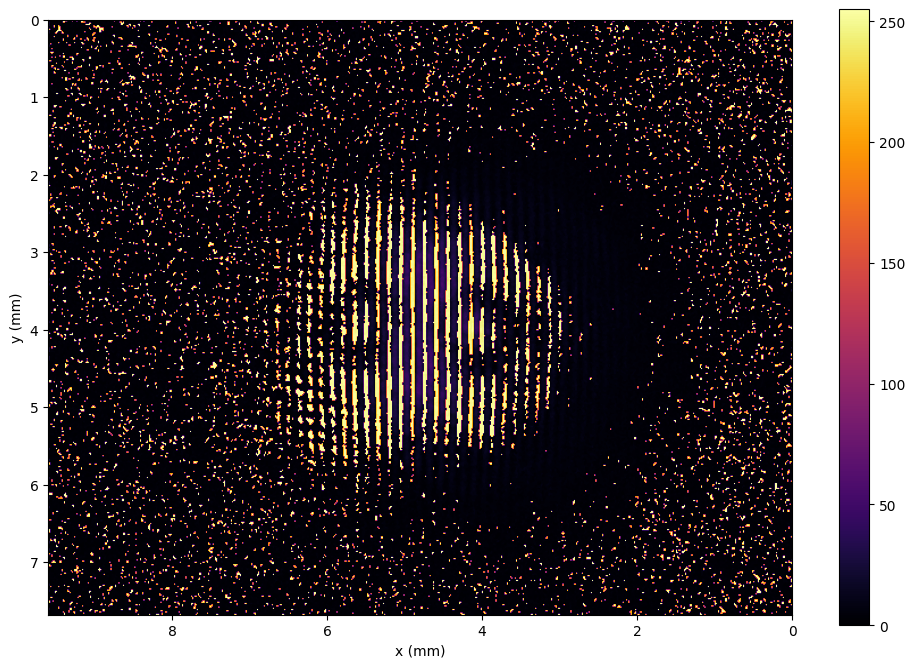

24.743406702359707


In [27]:
BeamBackground = np.maximum(beamABroadband, beamBBroadband) #Esimate the background light
#BeamBackground = beamABroadband + beamBBroadband
fringesCOR = ndimage.median_filter(fringesBroadband - BeamBackground, size=2)

fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(1, 1, 1)

im=plt.imshow(fringesCOR, cmap='inferno', extent=[9.6,0,7.68,0])

ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')
plt.colorbar(im)
plt.show()

print(fringesCOR.mean()) #We expect this to be close to 0

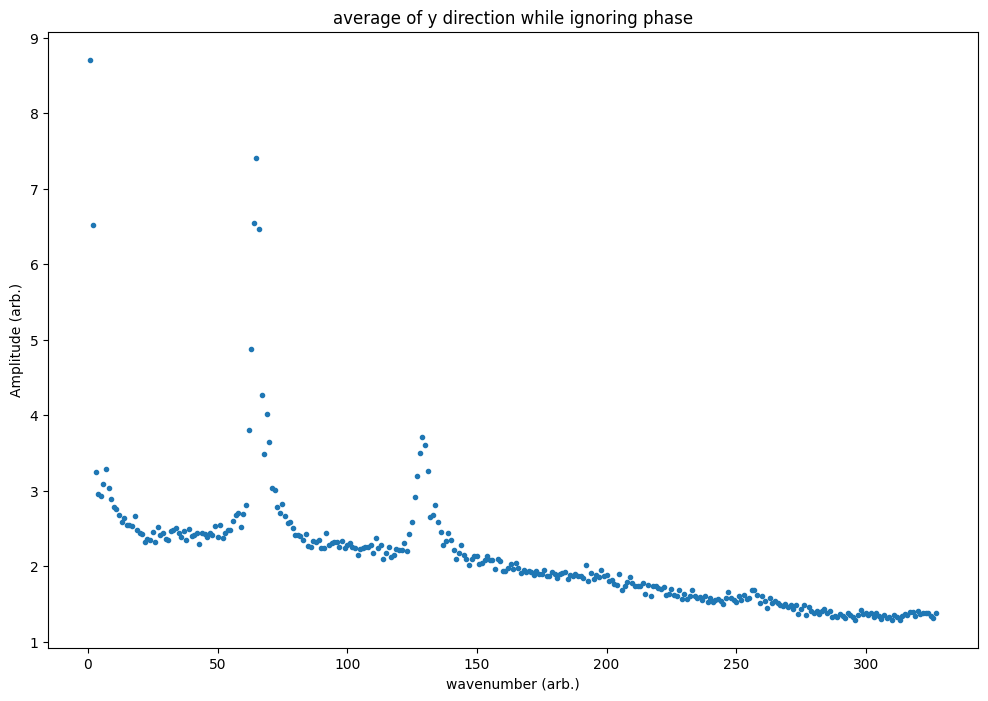

In [28]:
FT = np.fft.fft(fringesCOR, norm = "forward", axis = 1)

average_FT = np.mean(np.abs(FT), axis=0)
average_FT = np.fft.fftshift(average_FT) #rearranges the array such that 0,0 is centred

plt.figure(figsize = (12,8))
plt.subplot(1, 1, 1)

plt.plot(range(1,len(average_FT)//2),
        average_FT[len(average_FT)//2 +1:],
        linestyle = "none",
        marker = ".")

plt.xlabel('wavenumber (arb.)')
plt.ylabel('Amplitude (arb.)')
#plt.yscale("log")
plt.title("average of y direction while ignoring phase")

plt.show()